<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
sns.set()

## RAN results



In [3]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2, RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['TD', 1, 0, 0, 18, 17, 1, 0, 15, 13]
raw2 = ['TD', 2, 0, 0, 21, 20, 0, 0, 17, 18]
raw3 = ['DD', 1, 1, 1, 21, 25, 2, 0, 22, 21]
raw4 = ['DD', 2, 2, 1, 19, 18, 2, 0, 21, 19]

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [4]:
df = pd.DataFrame(rows, columns=column_names)

In [8]:
df['AccL'] = 100 - df[['RANL ACC 1', 'RANL ACC 2']].mean(axis=1) * 100/50
df['AccN'] = 100 - df[['RANN ACC 1', 'RANN ACC 2']].mean(axis=1) * 100/50
df['RT L'] = df[['RANL RT 1', 'RANL RT 2']].mean(axis=1)
df['RT N'] = df[['RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [9]:
df

,Subject,Session,RANL ACC 1,RANL ACC 2,RANL RT 1,RANL RT 2,RANN ACC 1,RANN ACC 2,RANN RT 1,RANN RT 2,AccL,AccN,RT L,RT N
0,TD,1,0,0,18,17,1,0,15,13,100.0,99.0,17.5,15.0
1,TD,2,0,0,21,20,0,0,17,18,100.0,100.0,20.5,17.0
2,DD,1,1,1,21,25,2,0,22,21,98.0,98.0,23.0,22.0
3,DD,2,2,1,19,18,2,0,21,19,97.0,98.0,18.5,21.0


In [12]:
df[['Subject', 'Session', 'AccL', 'AccN', 'RT L', 'RT N']]

,Subject,Session,AccL,AccN,RT L,RT N
0,TD,1,100.0,99.0,17.5,15.0
1,TD,2,100.0,100.0,20.5,17.0
2,DD,1,98.0,98.0,23.0,22.0
3,DD,2,97.0,98.0,18.5,21.0


In [21]:
bar_width = 0.35
positions = list(range(len(df['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions

def create_plots(plot, title):
  # Create subplots
  fig, ax = plt.subplots(figsize=(4, 4))

  pastel_blue = '#AEC6CF'
  pastel_orange = '#FFB347'

  subjects = df['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = df[(df['Subject'] == subject) & (df['Session'] == 1)][plot].values[0]
      session2_value = df[(df['Subject'] == subject) & (df['Session'] == 2)][plot].values[0]

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Session 1' if i == 0 else "", color=pastel_blue)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Session 2' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

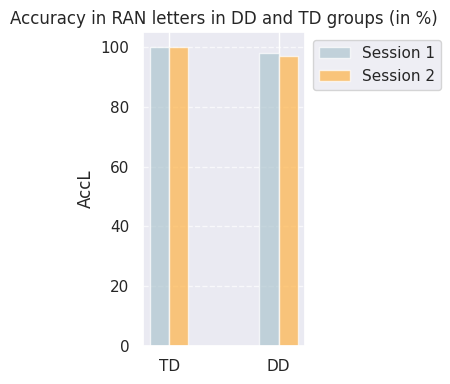

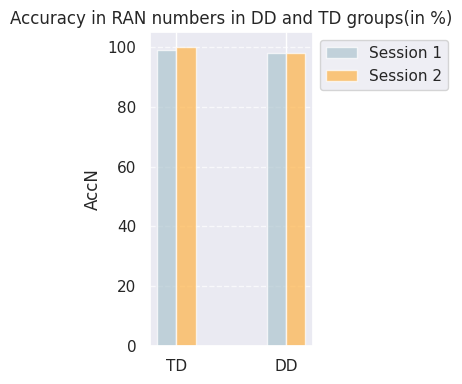

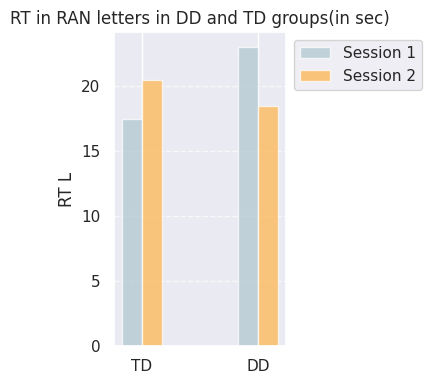

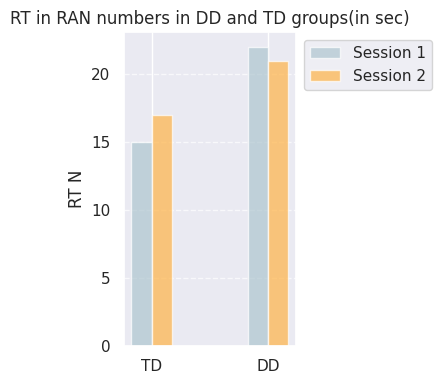

In [28]:
create_plots('AccL', 'Accuracy in RAN letters in DD and TD groups (in %)')
create_plots('AccN', 'Accuracy in RAN numbers in DD and TD groups(in %)')
create_plots('RT L', 'RT in RAN letters in DD and TD groups(in sec)')
create_plots('RT N', 'RT in RAN numbers in DD and TD groups(in sec)')

## Spoonerism

For spoonerism, we have 20 trials with a slide of instruction in between.

In [32]:
working_path = Path('/content/drive/MyDrive/KKNV/data/DD06/termin1')

In [40]:
cd /content/drive/MyDrive/KKNV/data/DD06/termin1

/content/drive/MyDrive/KKNV/data/DD06/termin1


In [39]:
!ls /content/drive/MyDrive/KKNV/data/DD06/termin1

 DD06-Spoonerism_task-20240410-163039-VTABO.log     'Temporal_Frequency_Final 17-03 10-Apr-2024'
'Reading Task_MarcoValdoV3 16-46 10-Apr-2024.xlsx'  'Temporal_Frequency_Final 17-06 10-Apr-2024'
'Temporal_Frequency_Final 16-54 10-Apr-2024'	    'Temporal_Frequency_Final 17-09 10-Apr-2024'
'Temporal_Frequency_Final 16-57 10-Apr-2024'	    'Temporal_Frequency_Final 17-13 10-Apr-2024'
'Temporal_Frequency_Final 16-58 10-Apr-2024'


In [69]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('DD06-Spoonerism_task-20240410-163039-VTABO.log'),
    delimiter='\t', skiprows=1, encoding='utf-8', on_bad_lines='skip'
)

In [70]:
data

Logfile written - 04/10/2024 16:35:29
Subject    Trial Event Type Code     Time    TTime          Uncertainty Duration    Uncertainty ReqTime     ReqDur  Stim Type                            Pair Index
DD06       1     Response   1        192479  192313         1           NaN         NaN         NaN         NaN     NaN                                         NaN
           2     Response   1        335598  143038         2           NaN         NaN         NaN         NaN     NaN                                         NaN
           3     Response   1        396799  61028          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           4     Response   1        515119  118162         1           NaN         NaN         NaN         NaN     NaN                                         NaN
           5     Response   1        598318  82991          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           6     Response   1        750159  151639         1           NaN         NaN         NaN         NaN     NaN                                         NaN
           7     Response   1        875118  124885         1           NaN         NaN         NaN         NaN     NaN                                         NaN
           8     Response   1        955597  80325          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           9     Response   1        1028317 72520          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           10    Response   1        1105919 77432          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           11    Response   1        1181279 75268          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           12    Response   1        1245437 64069          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           13    Response   1        1340962 95408          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           14    Response   1        1425679 84594          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           15    Response   1        1517677 91899          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           16    Response   1        1594078 76272          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           17    Response   1        1673357 79194          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           18    Response   1        1703438 29917          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           19    Response   1        1770558 67028          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           20    Response   1        1838797 68078          2           NaN         NaN         NaN         NaN     NaN                                         NaN
           21    Response   1        1906318 67412          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           22    Response   1        1971358 64931          1           NaN         NaN         NaN         NaN     NaN                                         NaN
           23    Response   1        2073118 101671         1           NaN         NaN         NaN         NaN     NaN                                         NaN
           24    Response 